In [2]:
import pandas as pd
import numpy as np

import scipy
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import sklearn
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
import sklearn.metrics as sm
from sklearn.preprocessing import scale
import scipy.cluster.hierarchy as shc 

In [3]:
dataset = pd.read_csv("spectogramextractedmusicfeatureset.csv")

In [4]:
dataset.shape

(1000, 31)

In [5]:
dataset.head()

,Filename,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.308197,0.082482,23.698370,1535.037572,0.001726,1834.035228,0.000684,3175.514131,0.070391,...,6.815101,0.110116,4.418635,-1.796708,-1.787790,0.341001,-2.629384,-0.309009,-0.734714,blues
1,blues.00001.wav,0.301338,0.064592,24.126800,1178.338976,0.000634,1719.624593,0.018852,2425.427000,0.044456,...,2.652497,0.832175,2.269111,-4.967726,-1.012166,0.995347,-0.605718,1.565148,-0.685939,blues
2,blues.00002.wav,0.296208,0.121434,25.195057,1303.581375,0.000763,1579.884288,0.022247,2479.285008,0.064793,...,4.676634,-7.930208,-5.197453,-8.683246,0.549078,-7.521339,-4.570396,-3.990504,-3.933193,blues
3,blues.00003.wav,0.378564,0.117686,23.537749,765.650527,0.000240,1289.465222,0.008652,1387.583276,0.024866,...,5.115472,0.440344,-1.861215,0.198612,1.217629,-0.756340,1.820389,-0.057328,-4.009497,blues
4,blues.00004.wav,0.261476,0.060902,25.022190,1539.421609,0.001334,1584.038983,-0.050764,2954.190470,0.085597,...,-6.884608,-6.819392,-12.406286,-10.841472,-8.155150,-5.439511,-1.908890,-7.093715,-17.604401,blues


In [7]:
X = dataset.drop(['Filename'],axis=1)
X

,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.308197,0.082482,23.698370,1535.037572,0.001726,1834.035228,0.000684,3175.514131,0.070391,-188.219376,...,6.815101,0.110116,4.418635,-1.796708,-1.787790,0.341001,-2.629384,-0.309009,-0.734714,blues
1,0.301338,0.064592,24.126800,1178.338976,0.000634,1719.624593,0.018852,2425.427000,0.044456,-286.179047,...,2.652497,0.832175,2.269111,-4.967726,-1.012166,0.995347,-0.605718,1.565148,-0.685939,blues
2,0.296208,0.121434,25.195057,1303.581375,0.000763,1579.884288,0.022247,2479.285008,0.064793,-165.737717,...,4.676634,-7.930208,-5.197453,-8.683246,0.549078,-7.521339,-4.570396,-3.990504,-3.933193,blues
3,0.378564,0.117686,23.537749,765.650527,0.000240,1289.465222,0.008652,1387.583276,0.024866,-274.498962,...,5.115472,0.440344,-1.861215,0.198612,1.217629,-0.756340,1.820389,-0.057328,-4.009497,blues
4,0.261476,0.060902,25.022190,1539.421609,0.001334,1584.038983,-0.050764,2954.190470,0.085597,-236.696884,...,-6.884608,-6.819392,-12.406286,-10.841472,-8.155150,-5.439511,-1.908890,-7.093715,-17.604401,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.312355,0.066177,26.828857,1585.924113,0.001471,1878.318531,-0.020311,3388.996174,0.066483,-213.199493,...,10.070771,-10.888953,2.198623,-8.872386,-0.953045,-12.683362,0.744433,-4.840060,-3.064359,rock
996,0.346405,0.060725,26.802236,1685.060612,0.001741,1869.974954,-0.012931,3395.737800,0.080015,-197.364792,...,12.185410,-15.749372,2.540702,-1.597802,0.542841,-10.845517,-0.644788,-7.396799,-5.802427,rock
997,0.366321,0.060540,26.163345,1807.488277,0.002249,1787.003967,0.003787,3561.578464,0.103777,-181.841599,...,6.846561,-16.928728,-3.545232,-11.599463,-2.044957,-12.994104,0.291607,-13.022841,-6.441196,rock
998,0.327976,0.071790,25.974198,1047.122495,0.000313,1548.829422,0.020775,2153.220313,0.036349,-285.583069,...,5.102398,-8.889581,-3.410276,-4.522196,-5.790967,-3.085016,0.166745,-4.406106,-5.594728,rock


In [8]:
features = ['Chromagram','RootMeanSquare','LowEnergyBrightness','SpectralCentroid','Flatness','Bandwidth','InHarmonicity','Rolloff','ZeroCrossingRate','mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20']
# Separating out the features
x = X.loc[:, features].values
# Separating out the target
y = X.loc[:,['label']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [10]:
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
print(principalDf)

     principal component 1  principal component 2  principal component 3
0                -0.373305              -0.572165              -1.118744
1                -1.361743               0.328000              -2.023324
2                -1.684370              -2.465247               0.496489
3                -2.266617               1.710264              -2.410508
4                -3.887427              -1.739087               3.686975
..                     ...                    ...                    ...
995              -0.531506              -3.625281               0.099904
996              -0.379777              -3.891110               0.222346
997              -0.486182              -4.550413               1.918884
998              -2.210289              -1.093683              -0.936219
999              -1.049921              -2.211604              -1.551170

[1000 rows x 3 columns]


In [11]:
finalDf = pd.concat([principalDf, X[['label']]], axis = 1)
print(finalDf)

     principal component 1  principal component 2  principal component 3  \
0                -0.373305              -0.572165              -1.118744   
1                -1.361743               0.328000              -2.023324   
2                -1.684370              -2.465247               0.496489   
3                -2.266617               1.710264              -2.410508   
4                -3.887427              -1.739087               3.686975   
..                     ...                    ...                    ...   
995              -0.531506              -3.625281               0.099904   
996              -0.379777              -3.891110               0.222346   
997              -0.486182              -4.550413               1.918884   
998              -2.210289              -1.093683              -0.936219   
999              -1.049921              -2.211604              -1.551170   

     label  
0    blues  
1    blues  
2    blues  
3    blues  
4    blues  
..     ..

In [12]:
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('2 component PCA', fontsize = 20)
# targets = ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']
# colors = ['r', 'g', 'b']
# for target, color in zip(targets,colors):
#     indicesToKeep = finalDf['label'] == target
#     ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
#                , finalDf.loc[indicesToKeep, 'principal component 2']
#                , c = color
#                , s = 50)
# ax.legend(targets)
# ax.grid()

In [13]:
z = linkage(principalDf, method = 'ward')

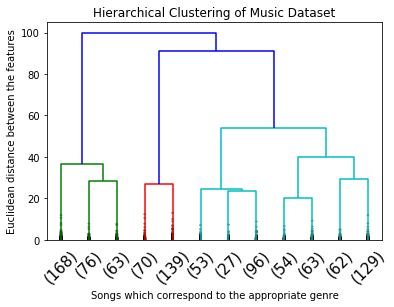

In [14]:
import scipy.cluster.hierarchy as sch
den = sch.dendrogram(z, truncate_mode= "lastp", p =12, leaf_rotation=45,leaf_font_size=15, show_contracted=True)
#den = sch.dendrogram(z)
plt.title('Hierarchical Clustering of Music Dataset')
plt.xlabel('Songs which correspond to the appropriate genre')
plt.ylabel('Euclidean distance between the features');
plt.show()

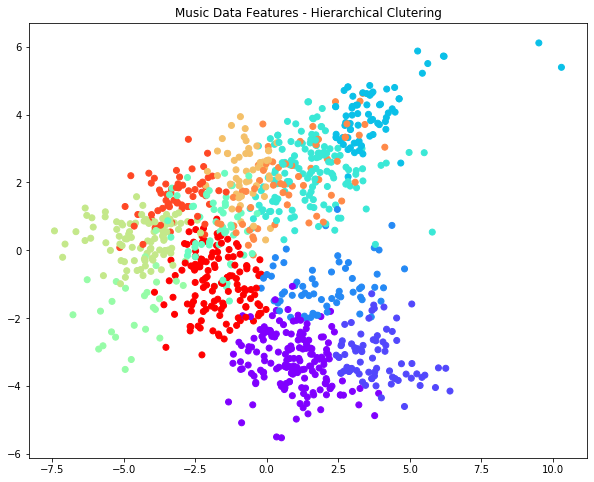

In [15]:
from scipy.cluster.hierarchy import fcluster
k=12
cluster_2 = fcluster(z, k, criterion='maxclust')
cluster_2[0:30:,]
plt.figure(figsize=(10, 8))
plt.scatter(principalDf.iloc[:,0], principalDf.iloc[:,1],c=cluster_2, cmap='rainbow')  
#plot points with cluster dependent colors
plt.title('Music Data Features - Hierarchical Clutering')
plt.show()

In [16]:
# New Dataframe called cluster
cluster_Hierarchical = pd.DataFrame(cluster_2)
# Adding the hierarchical clustering to dataset
dataset=dataset
dataset['cluster'] = cluster_Hierarchical
dataset

,Filename,Chromagram,RootMeanSquare,LowEnergyBrightness,SpectralCentroid,Flatness,Bandwidth,InHarmonicity,Rolloff,ZeroCrossingRate,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,cluster
0,blues.00000.wav,0.308197,0.082482,23.698370,1535.037572,0.001726,1834.035228,0.000684,3175.514131,0.070391,...,0.110116,4.418635,-1.796708,-1.787790,0.341001,-2.629384,-0.309009,-0.734714,blues,12
1,blues.00001.wav,0.301338,0.064592,24.126800,1178.338976,0.000634,1719.624593,0.018852,2425.427000,0.044456,...,0.832175,2.269111,-4.967726,-1.012166,0.995347,-0.605718,1.565148,-0.685939,blues,12
2,blues.00002.wav,0.296208,0.121434,25.195057,1303.581375,0.000763,1579.884288,0.022247,2479.285008,0.064793,...,-7.930208,-5.197453,-8.683246,0.549078,-7.521339,-4.570396,-3.990504,-3.933193,blues,12
3,blues.00003.wav,0.378564,0.117686,23.537749,765.650527,0.000240,1289.465222,0.008652,1387.583276,0.024866,...,0.440344,-1.861215,0.198612,1.217629,-0.756340,1.820389,-0.057328,-4.009497,blues,11
4,blues.00004.wav,0.261476,0.060902,25.022190,1539.421609,0.001334,1584.038983,-0.050764,2954.190470,0.085597,...,-6.819392,-12.406286,-10.841472,-8.155150,-5.439511,-1.908890,-7.093715,-17.604401,blues,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,0.312355,0.066177,26.828857,1585.924113,0.001471,1878.318531,-0.020311,3388.996174,0.066483,...,-10.888953,2.198623,-8.872386,-0.953045,-12.683362,0.744433,-4.840060,-3.064359,rock,1
996,rock.00096.wav,0.346405,0.060725,26.802236,1685.060612,0.001741,1869.974954,-0.012931,3395.737800,0.080015,...,-15.749372,2.540702,-1.597802,0.542841,-10.845517,-0.644788,-7.396799,-5.802427,rock,1
997,rock.00097.wav,0.366321,0.060540,26.163345,1807.488277,0.002249,1787.003967,0.003787,3561.578464,0.103777,...,-16.928728,-3.545232,-11.599463,-2.044957,-12.994104,0.291607,-13.022841,-6.441196,rock,1
998,rock.00098.wav,0.327976,0.071790,25.974198,1047.122495,0.000313,1548.829422,0.020775,2153.220313,0.036349,...,-8.889581,-3.410276,-4.522196,-5.790967,-3.085016,0.166745,-4.406106,-5.594728,rock,12


In [23]:
X = dataset.drop(['Filename','label','cluster'],axis=1) #Filename is not required
#Y = dataset['label']
Y = dataset['cluster']

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10)

In [25]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [26]:
y_pred = svclassifier.predict(X_test)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[16  0  1  0  0  0  0  0  0  0  0  0]
 [ 1  9  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3  0  0  0  0  0  0  0  0  1]
 [ 0  1  0  6  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 13  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  4  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  0  1]
 [ 0  0  0  0  0  0  0  1  0  0  6  1]
 [ 0  0  0  0  0  0  0  0  0  0  0 14]]
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        17
           2       0.82      0.90      0.86        10
           3       0.75      0.60      0.67         5
           4       0.86      0.75      0.80         8
           5       0.89      0.89      0.89         9
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       0.93      1.00      0.96        13
           9       0.80      0.67      0.73 

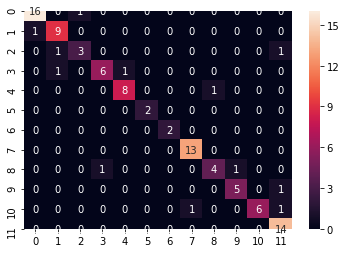

In [28]:
import seaborn as sns
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True)

In [29]:
C = confusion_matrix(Y_test,y_pred) + np.transpose(confusion_matrix(Y_test,y_pred))

In [30]:
print(C)

[[32  1  1  0  0  0  0  0  0  0  0  0]
 [ 1 18  1  1  0  0  0  0  0  0  0  0]
 [ 1  1  6  0  0  0  0  0  0  0  0  1]
 [ 0  1  0 12  1  0  0  0  1  0  0  0]
 [ 0  0  0  1 16  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 26  0  0  1  0]
 [ 0  0  0  1  1  0  0  0  8  1  0  0]
 [ 0  0  0  0  0  0  0  0  1 10  0  1]
 [ 0  0  0  0  0  0  0  1  0  0 12  1]
 [ 0  0  1  0  0  0  0  0  0  1  1 28]]


In [31]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 11, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_test)
#print(hc.labels_)
y_hc

array([ 3,  7,  6,  9,  9,  6,  7,  4,  5,  6,  1,  7,  3,  0,  5,  6,  3,
        2,  0,  3,  6,  3,  5,  3,  3,  2,  2,  0,  3,  0,  2,  2,  3,  5,
        4,  4,  6,  7,  4,  7,  7,  3,  3,  7,  6,  7,  8,  2,  8,  6,  6,
       10, 10,  3,  4, 10,  4,  6,  4,  6, 10,  5,  4, 10,  2,  4,  7,  8,
        4,  6,  7,  7,  0,  1,  4,  2,  5,  2,  8,  2,  0,  6,  2, 10,  2,
        3, 10,  0,  4,  9,  6,  4,  6,  6, 10,  0,  7,  0,  9, 10],
      dtype=int64)

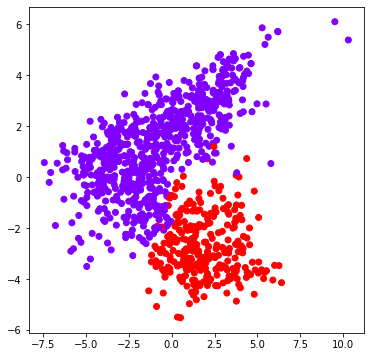

In [32]:
ac2 = AgglomerativeClustering(n_clusters = 2) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],  
           c = ac2.fit_predict(principalDf), cmap ='rainbow') 
plt.show() 

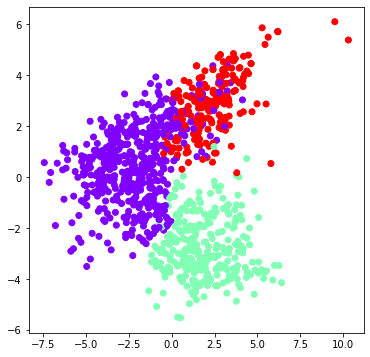

In [33]:
ac3 = AgglomerativeClustering(n_clusters = 3) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],  
           c = ac3.fit_predict(principalDf), cmap ='rainbow') 
plt.show() 

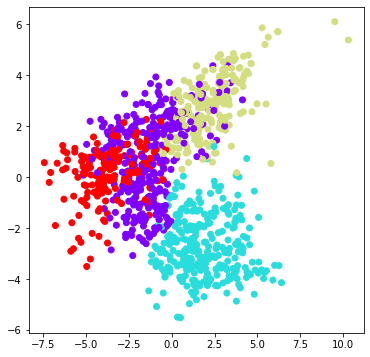

In [34]:
ac4 = AgglomerativeClustering(n_clusters = 4) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],  
           c = ac4.fit_predict(principalDf), cmap ='rainbow') 
plt.show() 

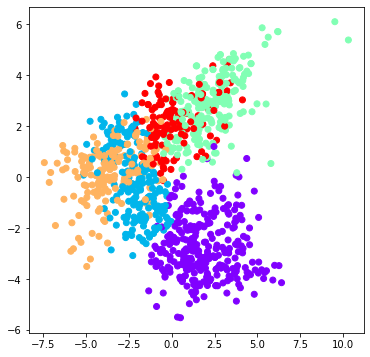

In [35]:
ac5 = AgglomerativeClustering(n_clusters = 5) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],  
           c = ac5.fit_predict(principalDf), cmap ='rainbow') 
plt.show() 

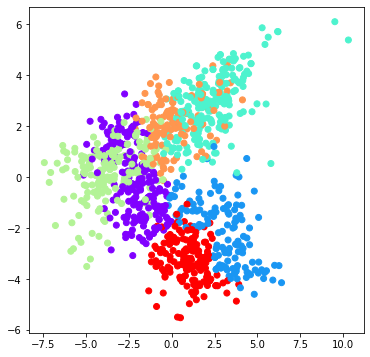

In [36]:
ac6 = AgglomerativeClustering(n_clusters = 6) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],  
           c = ac6.fit_predict(principalDf), cmap ='rainbow') 
plt.show() 

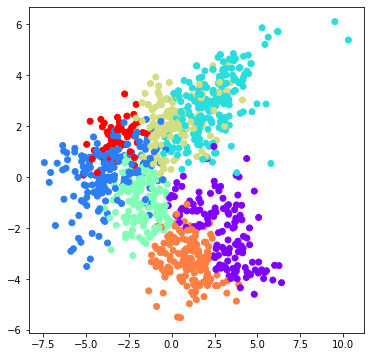

In [37]:
ac7 = AgglomerativeClustering(n_clusters = 7) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],  
           c = ac7.fit_predict(principalDf), cmap ='rainbow') 
plt.show() 

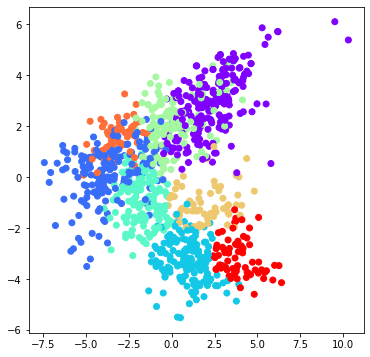

In [38]:
ac8 = AgglomerativeClustering(n_clusters = 8) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],  
           c = ac8.fit_predict(principalDf), cmap ='rainbow') 
plt.show() 

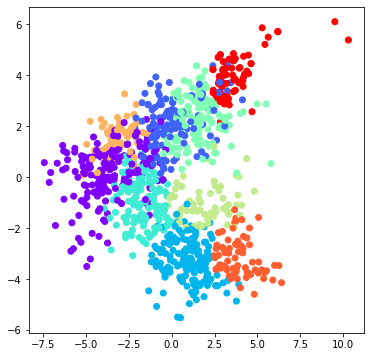

In [39]:
ac9 = AgglomerativeClustering(n_clusters = 9) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],  
           c = ac9.fit_predict(principalDf), cmap ='rainbow') 
plt.show() 

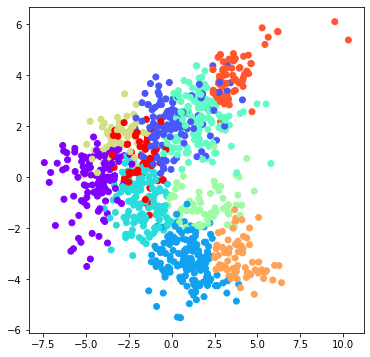

In [40]:
ac10 = AgglomerativeClustering(n_clusters = 10) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],  
           c = ac10.fit_predict(principalDf), cmap ='rainbow') 
plt.show() 

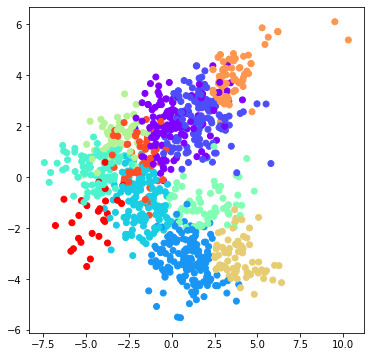

In [41]:
ac11 = AgglomerativeClustering(n_clusters = 11) 
  
# Visualizing the clustering 
plt.figure(figsize =(6, 6)) 
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'],  
           c = ac11.fit_predict(principalDf), cmap ='rainbow') 
plt.show() 

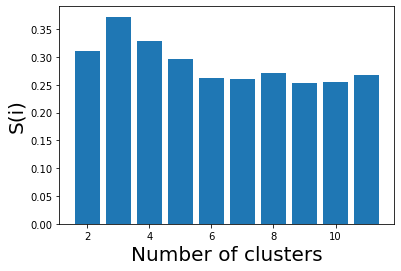

In [42]:
#Finding optimal number of clusters
k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11] 
# Appending the silhouette scores of the different models to the list 
silhouette_scores = [] 
silhouette_scores.append( 
        silhouette_score(principalDf, ac2.fit_predict(principalDf)))  
silhouette_scores.append( 
        silhouette_score(principalDf, ac3.fit_predict(principalDf)))  
silhouette_scores.append( 
        silhouette_score(principalDf, ac4.fit_predict(principalDf)))  
silhouette_scores.append( 
        silhouette_score(principalDf, ac5.fit_predict(principalDf)))  
silhouette_scores.append( 
        silhouette_score(principalDf, ac6.fit_predict(principalDf)))  
silhouette_scores.append( 
        silhouette_score(principalDf, ac7.fit_predict(principalDf)))  
silhouette_scores.append( 
        silhouette_score(principalDf, ac8.fit_predict(principalDf)))  
silhouette_scores.append( 
        silhouette_score(principalDf, ac9.fit_predict(principalDf)))  
silhouette_scores.append( 
        silhouette_score(principalDf, ac10.fit_predict(principalDf)))  
silhouette_scores.append( 
        silhouette_score(principalDf, ac11.fit_predict(principalDf)))  
  
  
# Plotting a bar graph to compare the results 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 20) 
plt.ylabel('S(i)', fontsize = 20) 
plt.show() 

In [106]:
#Emalgamate 2 clusters into 1 and retry